## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

## Light Curve Plotter

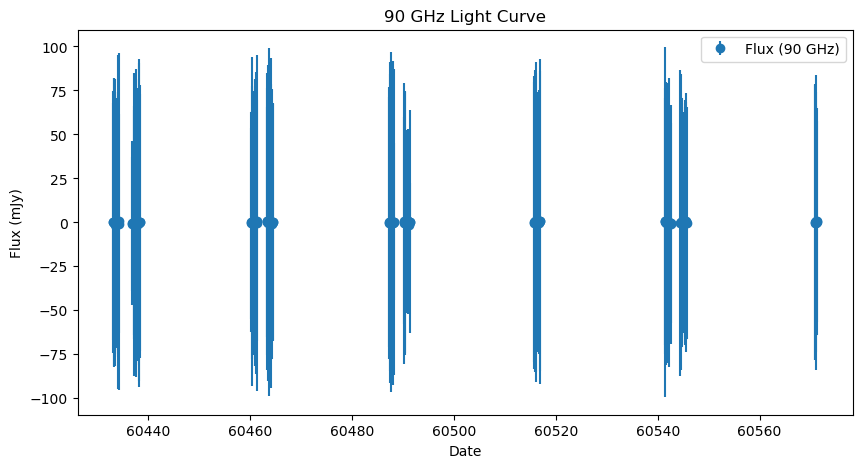

In [3]:
from astropy.table import Table
dat = Table.read('/Users/Djslime07/Downloads/lightcurve_90GHz_passthrough (1).fits', format='fits')
dates90 = dat['dates_ave'][0]
flux90 = dat['flux_SCI'][0]
fluxwgt90 =  dat['flux_WGT'][0]

df = dat.to_pandas()
plt.figure(figsize=(10, 5))
plt.errorbar(df['dates_ave'][0], df['flux_SCI'][0], yerr=df['flux_WGT'][0], fmt='o', label='Flux (90 GHz)')
plt.xlabel('Date')
plt.ylabel('Flux (mJy)')
plt.title('90 GHz Light Curve')
plt.legend()
plt.show()

## FITS File Plotter

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -64 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                   38 / length of data axis 1                          NAXIS2  =                   38 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H EXTNAME = 'SCI     '                                                            WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =               3678.5 / Pixel coordinate of reference point            CRPIX2  =              -3035.5 / Pixel coordinate of reference point            CDELT1  =  -0.0041666666666667 / [deg] C

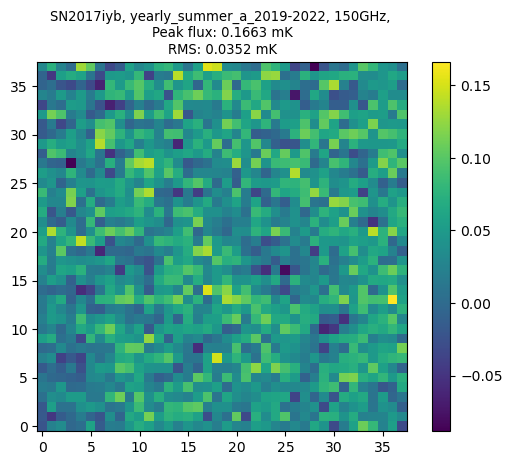

yearly_summer_a_2019-2022, None ,0.16627588743013533, 0.03521155522606493


In [10]:
file_path = "/Users/Djslime07/Downloads/SN2017iyb_150GHz_yearly_summer_a_2019-2022_psth.fits"

with fits.open(file_path) as hdul:
    data = hdul[0].data
    header = hdul[0].header
    print(header)

    date_beg = header.get('DATE-BEG', 'Unknown')
    date_end = header.get('DATE-END', 'Unknown')
    print(f"Observation Start Date: {date_beg}")
    print(f"Observation End Date: {date_end}")
    name = header.get('OBJECT', 'Unknown')
    band = header.get('BAND', 'Unknown')

    peak_flux = np.ma.max(data)
    peakstr = f"Peak flux: {peak_flux:.4} mK"
    print(peakstr)

    rms_temp = np.ma.std(data)
    keep = np.ma.abs(data) <= 3 * rms_temp
    rms = np.ma.std(data[keep])
    rmsstr = f"RMS: {rms:.4f} mK"
    print(rmsstr)

    if data is not None:
        plt.figure()
        plt.imshow(data, origin='lower')
        plt.colorbar()
        plt.title(f"{name}, {date_beg}, {band}, \n{peakstr}\n{rmsstr}", fontsize=9.5)
        plt.show()

        print(f"{date_beg}, {date_end} ,{peak_flux}, {rms}")
        